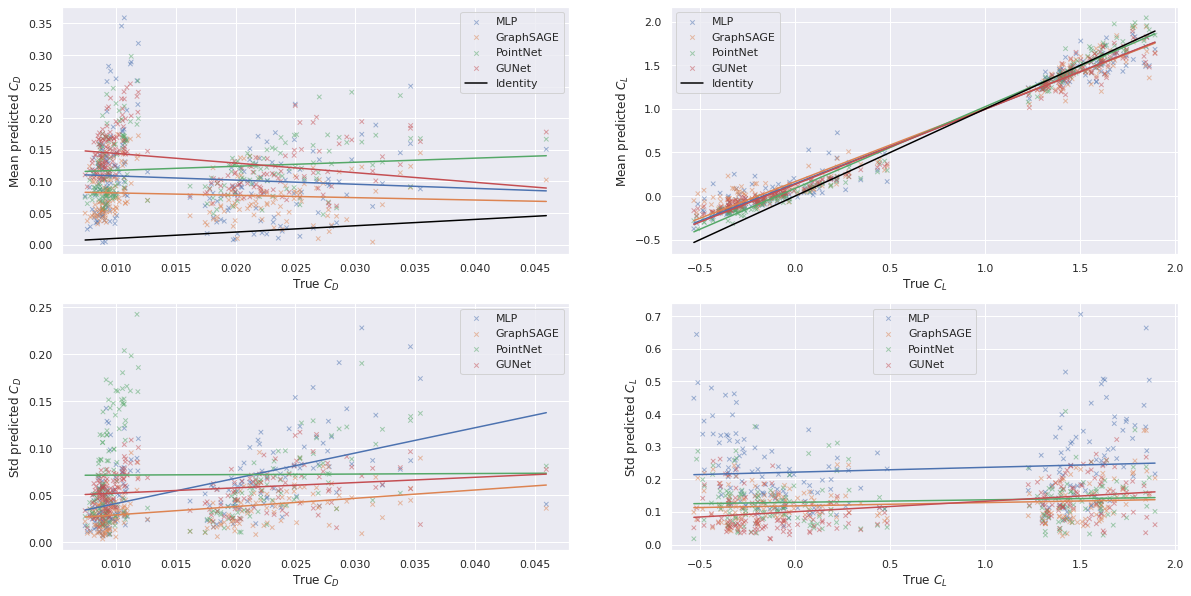

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

sets = ['full', 'scarce', 'reynolds', 'aoa']
for s in sets:
    true_coefs = np.load('scores/' + s + '/true_coefs.npy')
    pred_coefs_mean = np.load('scores/' + s + '/pred_coefs_mean.npy')
    pred_coefs_std = np.load('scores/' + s + '/pred_coefs_std.npy')

    sns.set()

    fig, ax = plt.subplots(2, 2, figsize = (20, 10))
    # ax[2].scatter(true_coefs[:, 1], true_coefs[:, 0], label = 'True', color = 'black', marker = 's')
    model_name = ['MLP', 'GraphSAGE', 'PointNet', 'GUNet']
    for l, model in enumerate(model_name):
        reg = linear_model.LinearRegression()
        reg.fit(true_coefs[:, :1], pred_coefs_mean[:, l, :1])
        x_zero = np.array([true_coefs[:, 0].min(), true_coefs[:, 0].max()])
        y = reg.predict(x_zero[:, None])
        ax[0, 0].plot(x_zero, y)
        ax[0, 0].scatter(true_coefs[:, 0], pred_coefs_mean[:, l, 0], alpha = 0.5, linewidths = 1, marker = 'x', s = 20*np.ones_like(true_coefs[:, 0]), label = model)
        
        reg = linear_model.LinearRegression()
        reg.fit(true_coefs[:, 1:2], pred_coefs_mean[:, l, 1:2])
        x_one = np.array([true_coefs[:, 1].min(), true_coefs[:, 1].max()])
        y = reg.predict(x_one[:, None])
        ax[0, 1].plot(x_one, y)
        ax[0, 1].scatter(true_coefs[:, 1], pred_coefs_mean[:, l, 1], alpha = 0.5, linewidths = 1, marker = 'x', s = 20*np.ones_like(true_coefs[:, 1]), label = model)

        reg = linear_model.LinearRegression()
        reg.fit(true_coefs[:, :1], pred_coefs_std[:, l, :1])
        x = np.array([true_coefs[:, 0].min(), true_coefs[:, 0].max()])
        y = reg.predict(x[:, None])
        ax[1, 0].plot(x, y)
        ax[1, 0].scatter(true_coefs[:, 0], pred_coefs_std[:, l, 0], alpha = 0.5, linewidths = 1, marker = 'x', s = 20*np.ones_like(true_coefs[:, 0]), label = model)

        reg = linear_model.LinearRegression()
        reg.fit(true_coefs[:, 1:2], pred_coefs_std[:, l, 1:2])
        x = np.array([true_coefs[:, 1].min(), true_coefs[:, 1].max()])
        y = reg.predict(x[:, None])
        ax[1, 1].plot(x, y)
        ax[1, 1].scatter(true_coefs[:, 1], pred_coefs_std[:, l, 1], alpha = 0.5, linewidths = 1, marker = 'x', s = 20*np.ones_like(true_coefs[:, 1]), label = model)
        # ax[2].errorbar(pred_coefs_mean[:, l, 1], pred_coefs_mean[:, l, 0], xerr = pred_coefs_std[:, l, 1], yerr = pred_coefs_std[:, l, 0], fmt = 'x', capsize = 3, label = model)
    ax[0, 0].plot(x_zero, x_zero, c = 'black', label = 'Identity')
    ax[0, 0].set_xlabel('True ' + r'$C_D$')
    ax[0, 0].set_ylabel('Mean predicted ' + r'$C_D$')
    ax[0, 1].plot(x_one, x_one, c = 'black', label = 'Identity')
    ax[0, 1].set_xlabel('True ' + r'$C_L$')
    ax[0, 1].set_ylabel('Mean predicted ' + r'$C_L$')
    ax[0, 0].legend(loc = 'best')
    ax[0, 1].legend(loc = 'best')

    ax[1, 0].set_xlabel('True ' + r'$C_D$')
    ax[1, 0].set_ylabel('Std predicted ' + r'$C_D$')
    ax[1, 1].set_xlabel('True ' + r'$C_L$')
    ax[1, 1].set_ylabel('Std predicted ' + r'$C_L$')
    ax[1, 0].legend(loc = 'best')
    ax[1, 1].legend(loc = 'best');

    fig.savefig('scores/' + s + '/coefs.png', bbox_inches = 'tight', dpi = 150)

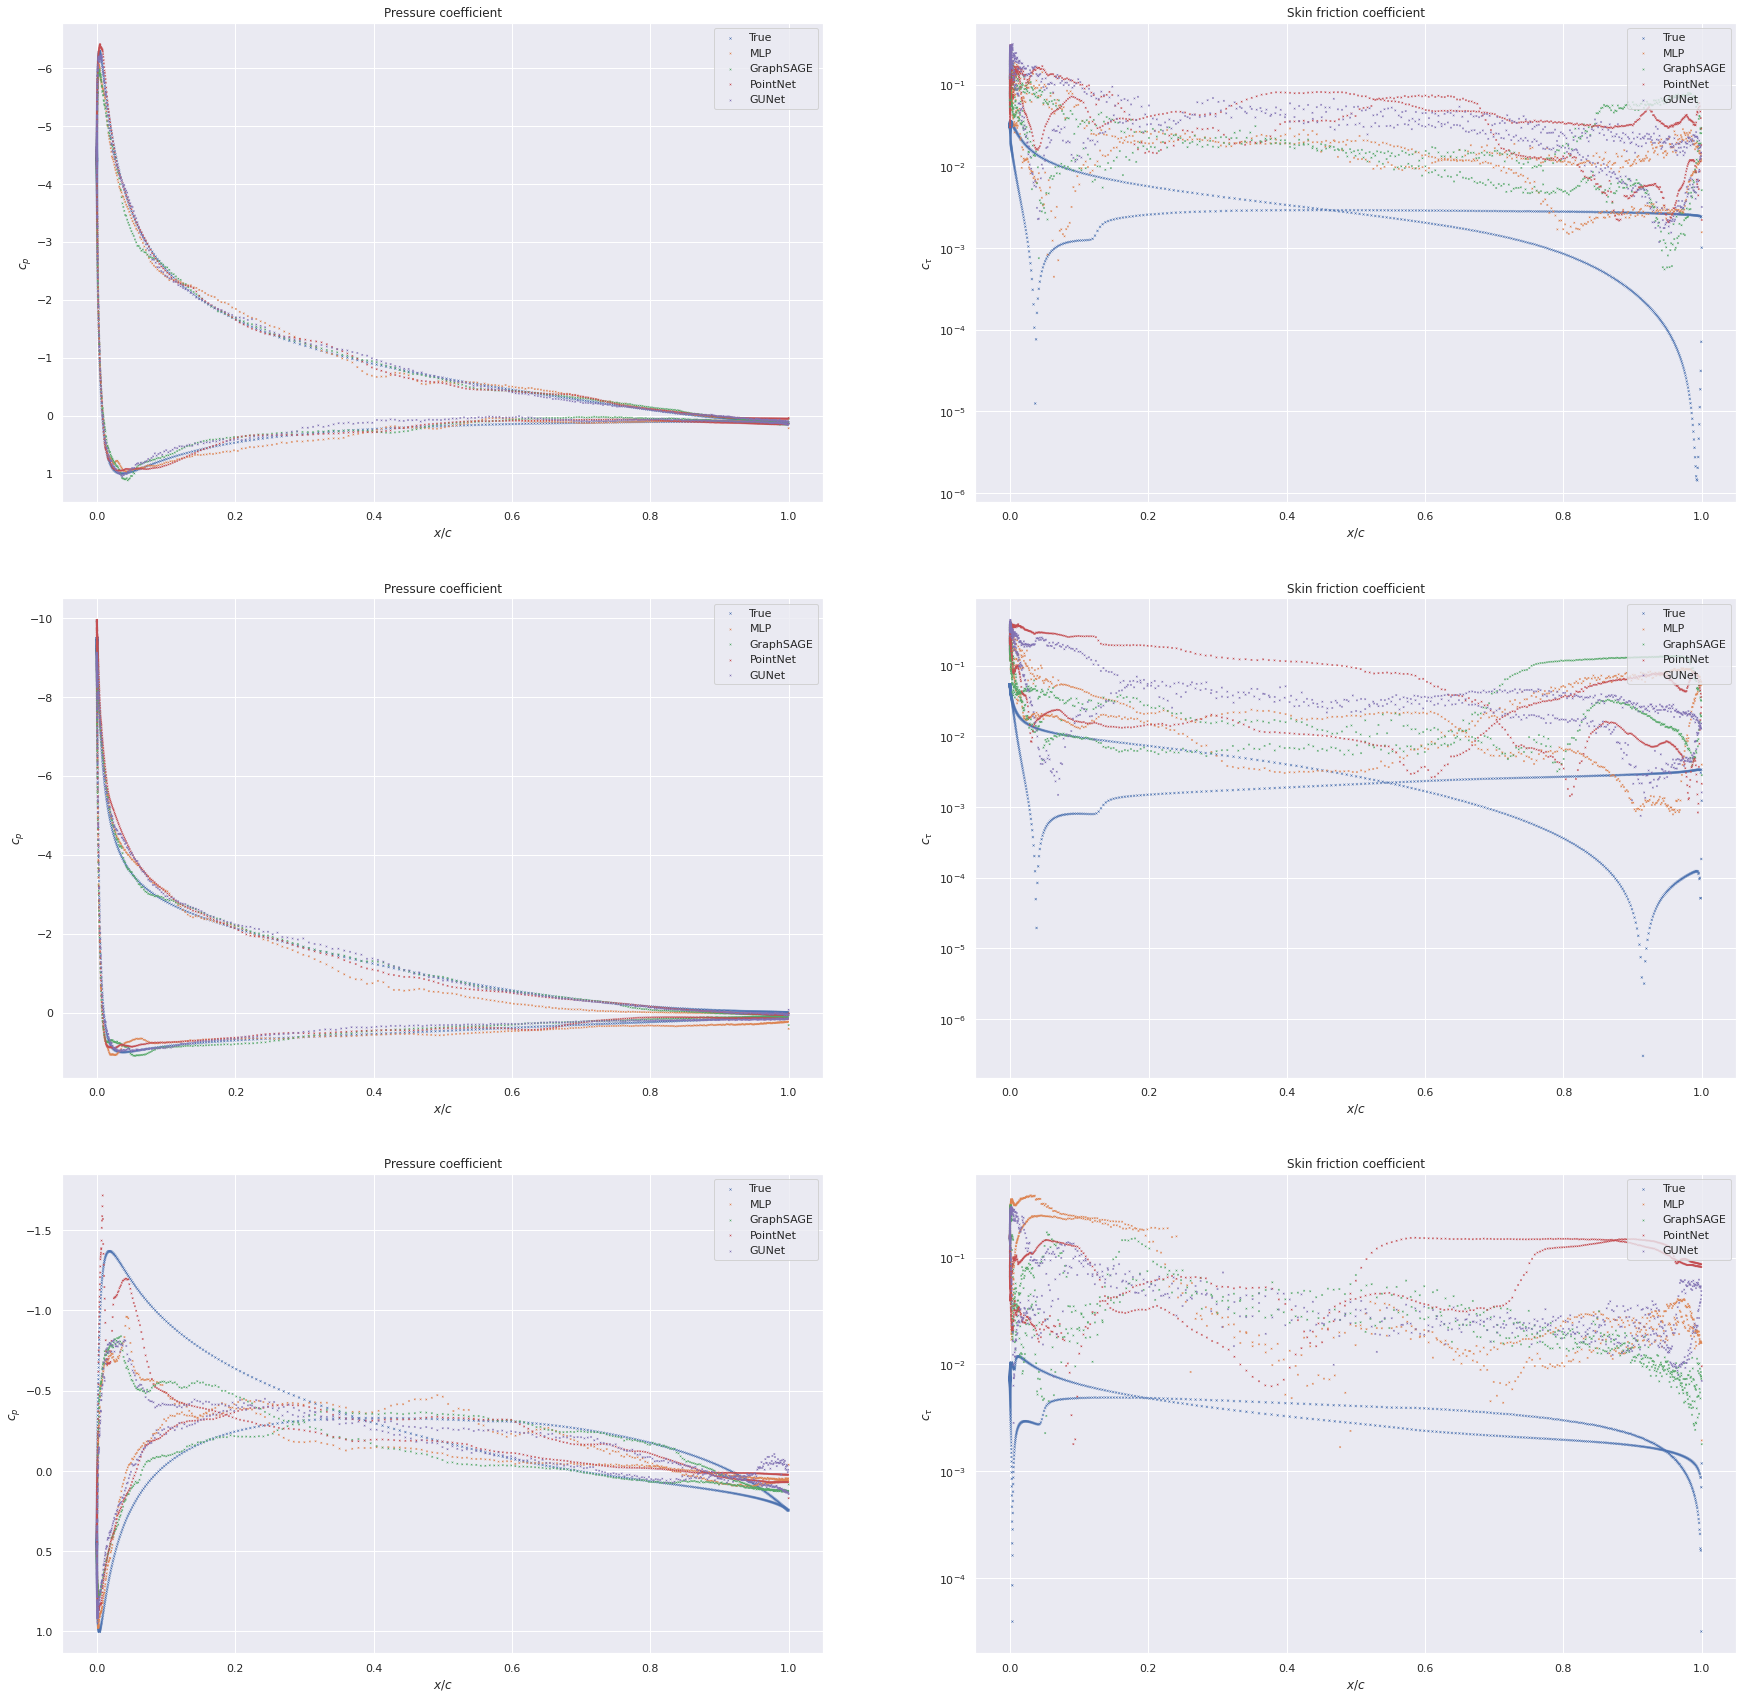

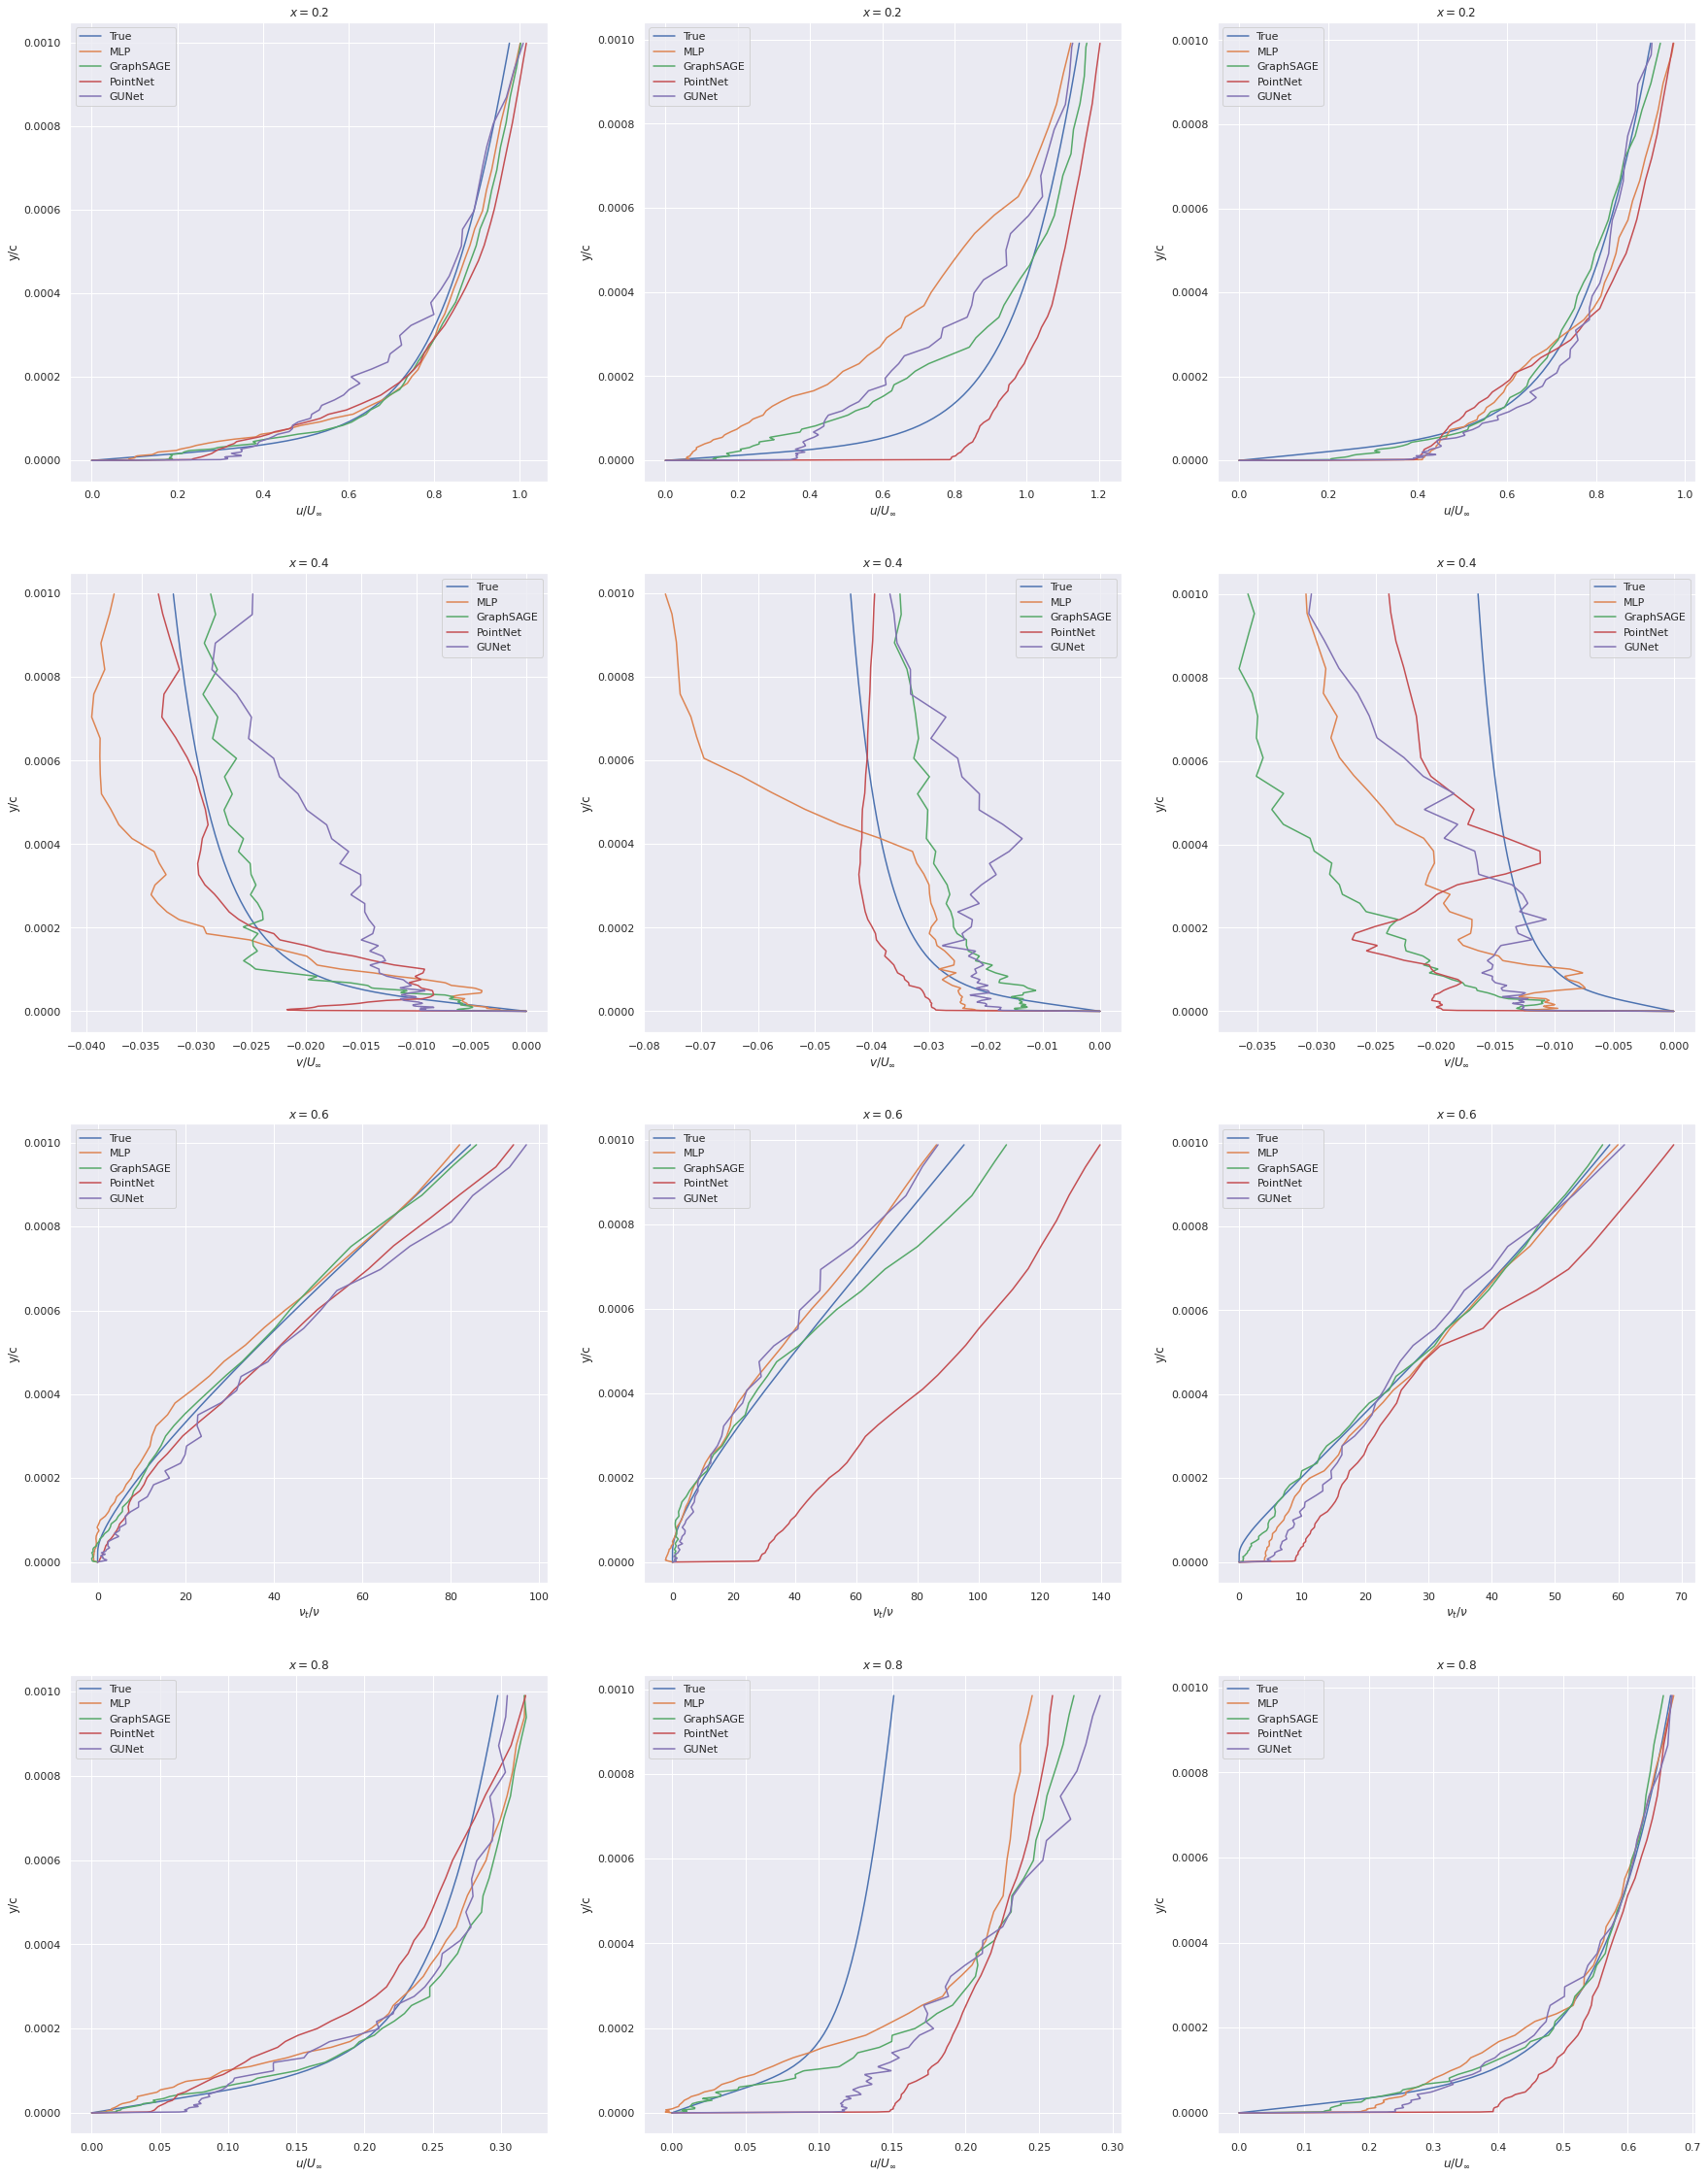

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sets = ['full', 'scarce', 'reynolds', 'aoa']
for s in sets:
    model_name = ['MLP', 'GraphSAGE', 'PointNet', 'GUNet']
    xs = [str(0.2), str(0.4), str(0.6), str(0.8)]

    true_surf_coefs = []
    for i in range (3):
        true_surf_coefs.append(np.load('scores/' + s + '/true_surf_coefs_' + str(i) + '.npy'))
    surf_coefs = []
    for i in range (3):
        surf_coefs.append(np.load('scores/' + s + '/surf_coefs_' + str(i) + '.npy'))
    true_bls = np.load('scores/' + s + '/true_bls.npy')
    bls = np.load('scores/' + s + '/bls.npy')

    fig, ax = plt.subplots(len(surf_coefs), 2, figsize = (int(len(surf_coefs)*10), 30))
    for i in range(len(surf_coefs)):
        ax[i, 0].scatter(true_surf_coefs[i][0, :, 0], true_surf_coefs[i][0, :, 1], label = 'True', linewidths = .5, marker = 'x', s = 5*np.ones_like(true_surf_coefs[i][0, :, 0]))
        ax[i, 1].scatter(true_surf_coefs[i][1, :, 0], true_surf_coefs[i][1, :, 1], label = 'True', linewidths = .5, marker = 'x', s = 5*np.ones_like(true_surf_coefs[i][1, :, 0]))
        for j in range(len(surf_coefs[0])):
            ax[i, 0].scatter(surf_coefs[i][j, 0, :, 0], surf_coefs[i][j, 0, :, 1], label = model_name[j], linewidths = .5, marker = 'x', s = 3*np.ones_like(surf_coefs[i][j, 0, :, 0]))
            ax[i, 1].scatter(surf_coefs[i][j, 1, :, 0], surf_coefs[i][j, 1, :, 1], label = model_name[j], linewidths = .5, marker = 'x', s = 3*np.ones_like(surf_coefs[i][j, 1, :, 0]))
        ax[i, 0].set_xlabel(r'$x/c$')
        ax[i, 1].set_xlabel(r'$x/c$')
        ax[i, 0].set_ylabel(r'$c_p$')
        ax[i, 1].set_ylabel(r'$c_\tau$')
        ax[i, 0].set_title('Pressure coefficient')
        ax[i, 1].set_title('Skin friction coefficient')
        ax[i, 0].legend(loc = 'upper right')
        ax[i, 1].legend(loc = 'upper right')
        ax[i, 0].invert_yaxis()
        ax[i, 1].set_yscale('log')
    fig.savefig('scores/' + s + '/surf.png', bbox_inches = 'tight', dpi = 300)

    fig, ax = plt.subplots(4, len(bls), figsize = (int(len(bls)*10), 40))
    for i in range(len(bls)):
        j = 0
        ax[j, i].plot(true_bls[i, j, 1], true_bls[i, j, 0], label = 'True')
        for k in range(len(bls[0])):
            ax[j, i].plot(bls[i, k, j, 1], bls[i, k, j, 0], label = model_name[k])
        ax[j, i].set_xlabel(r'$u/U_\infty$')
        ax[j, i].set_ylabel(r'y/c')
        ax[j, i].set_title(r'$x = $' + xs[j])
        ax[j, i].legend(loc = 'best')

        j = 1
        ax[j, i].plot(true_bls[i, j, 2], true_bls[i, j, 0], label = 'True')
        for k in range(len(bls[0])):
            ax[j, i].plot(bls[i, k, j, 2], bls[i, k, j, 0], label = model_name[k])
        ax[j, i].set_xlabel(r'$v/U_\infty$')
        ax[j, i].set_ylabel(r'y/c')
        ax[j, i].set_title(r'$x = $' + xs[j])
        ax[j, i].legend(loc = 'best')

        j = 2
        ax[j, i].plot(true_bls[i, j, 3], true_bls[i, j, 0], label = 'True')
        for k in range(len(bls[0])):
            ax[j, i].plot(bls[i, k, j, 3], bls[i, k, j, 0], label = model_name[k])
        ax[j, i].set_xlabel(r'$\nu_t/\nu$')
        ax[j, i].set_ylabel(r'y/c')
        ax[j, i].set_title(r'$x = $' + xs[j])
        ax[j, i].legend(loc = 'best')

        j = 3
        ax[j, i].plot(true_bls[i, j, 1], true_bls[i, j, 0], label = 'True')
        for k in range(len(bls[0])):
            ax[j, i].plot(bls[i, k, j, 1], bls[i, k, j, 0], label = model_name[k])
        ax[j, i].set_xlabel(r'$u/U_\infty$')
        ax[j, i].set_ylabel(r'y/c')
        ax[j, i].set_title(r'$x = $' + xs[j])
        ax[j, i].legend(loc = 'best')
    fig.savefig('scores/' + s + '/bl.png', bbox_inches = 'tight', dpi = 300)